In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis for House Price Prediction

In [2]:
HouseDF = pd.read_csv('E:\Rizwan study\ML Task/Complete dataset1.csv')
HouseDF

,Region Name,State,Year,House Price for 1 Bedroom,House Price for 2 Bedroom,House Price for 3 Bedroom,House Price for 4 Bedroom,House Price for 5 Bedroom,Inflation Rate,Mortgage Rate,Unemployment Rate
0,Anchorage Borough,AK,5/31/2006,171828.0,NaN,107539.0,217366.0,319275.0,202.5,5.92,4.6
1,Fairbanks North Star Borough,AK,5/31/2006,86058.0,NaN,429563.0,173730.0,336771.0,202.5,5.92,4.6
2,Juneau Borough,AK,5/31/2006,165691.0,NaN,130096.0,136614.0,NaN,202.5,5.92,4.6
3,Kenai Peninsula Borough,AK,5/31/2006,101413.0,118944.0,77373.0,86021.0,128538.0,202.5,5.92,4.6
4,Ketchikan Gateway Borough,AK,5/31/2006,84840.0,69894.0,89360.0,NaN,301777.0,202.5,5.92,4.6
...,...,...,...,...,...,...,...,...,...,...,...
790631,Mille Lacs County,MN,9/30/2001,NaN,NaN,NaN,158081.0,NaN,178.3,6.79,5.0
790632,Morrison County,MN,9/30/2001,72286.0,NaN,NaN,NaN,216179.0,178.3,6.79,5.0
790633,Mower County,MN,9/30/2001,39008.0,NaN,NaN,NaN,228803.0,178.3,6.79,5.0
790634,Murray County,MN,9/30/2001,NaN,NaN,NaN,117818.0,164315.0,178.3,6.79,5.0


In [3]:
HouseDF.shape

(790636, 11)

In [4]:
HouseDF.head()

,Region Name,State,Year,House Price for 1 Bedroom,House Price for 2 Bedroom,House Price for 3 Bedroom,House Price for 4 Bedroom,House Price for 5 Bedroom,Inflation Rate,Mortgage Rate,Unemployment Rate
0,Anchorage Borough,AK,5/31/2006,171828.0,NaN,107539.0,217366.0,319275.0,202.5,5.92,4.6
1,Fairbanks North Star Borough,AK,5/31/2006,86058.0,NaN,429563.0,173730.0,336771.0,202.5,5.92,4.6
2,Juneau Borough,AK,5/31/2006,165691.0,NaN,130096.0,136614.0,NaN,202.5,5.92,4.6
3,Kenai Peninsula Borough,AK,5/31/2006,101413.0,118944.0,77373.0,86021.0,128538.0,202.5,5.92,4.6
4,Ketchikan Gateway Borough,AK,5/31/2006,84840.0,69894.0,89360.0,NaN,301777.0,202.5,5.92,4.6


In [5]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790636 entries, 0 to 790635
Data columns (total 11 columns):
Region Name                  790636 non-null object
State                        790636 non-null object
Year                         790636 non-null object
House Price for 1 Bedroom    531895 non-null float64
House Price for 2 Bedroom    539878 non-null float64
House Price for 3 Bedroom    549212 non-null float64
House Price for 4 Bedroom    548956 non-null float64
House Price for 5 Bedroom    543919 non-null float64
Inflation Rate               790636 non-null float64
Mortgage Rate                790636 non-null float64
Unemployment Rate            790636 non-null float64
dtypes: float64(8), object(3)
memory usage: 66.4+ MB


In [6]:
HouseDF.describe()

,House Price for 1 Bedroom,House Price for 2 Bedroom,House Price for 3 Bedroom,House Price for 4 Bedroom,House Price for 5 Bedroom,Inflation Rate,Mortgage Rate,Unemployment Rate
count,531895.000000,5.398780e+05,5.492120e+05,5.489560e+05,5.439190e+05,790636.000000,790636.000000,790636.000000
mean,94329.941492,1.016993e+05,1.390543e+05,1.894752e+05,2.480273e+05,208.874172,5.311457,5.795033
std,68747.385985,7.606775e+04,9.664233e+04,1.470099e+05,2.382595e+05,31.942361,1.436215,1.871292
min,11702.000000,1.390800e+04,2.015200e+04,2.810200e+04,2.213500e+04,154.400000,2.710000,3.500000
25%,52637.000000,5.813525e+04,8.850200e+04,1.177980e+05,1.419205e+05,179.800000,3.960000,4.500000
50%,76460.000000,8.161300e+04,1.165880e+05,1.588105e+05,1.997630e+05,212.950000,5.435000,5.200000
75%,113926.000000,1.216090e+05,1.587680e+05,2.186715e+05,2.867085e+05,236.900000,6.660000,6.300000
max,997541.000000,1.542669e+06,2.905687e+06,5.721834e+06,8.218720e+06,263.000000,7.480000,14.800000


In [7]:
HouseDF.columns

Index(['Region Name', 'State', 'Year', 'House Price for 1 Bedroom',
       'House Price for 2 Bedroom', 'House Price for 3 Bedroom',
       'House Price for 4 Bedroom', 'House Price for 5 Bedroom',
       'Inflation Rate', 'Mortgage Rate', 'Unemployment Rate'],
      dtype='object')

In [8]:
#show missing value in the dataset
HouseDF.isnull().sum()

Region Name                       0
State                             0
Year                              0
House Price for 1 Bedroom    258741
House Price for 2 Bedroom    250758
House Price for 3 Bedroom    241424
House Price for 4 Bedroom    241680
House Price for 5 Bedroom    246717
Inflation Rate                    0
Mortgage Rate                     0
Unemployment Rate                 0
dtype: int64

In [9]:
missing_value_per = HouseDF.isnull().sum()/HouseDF.shape[0] * 100
missing_value_per

Region Name                   0.000000
State                         0.000000
Year                          0.000000
House Price for 1 Bedroom    32.725679
House Price for 2 Bedroom    31.715986
House Price for 3 Bedroom    30.535417
House Price for 4 Bedroom    30.567796
House Price for 5 Bedroom    31.204878
Inflation Rate                0.000000
Mortgage Rate                 0.000000
Unemployment Rate             0.000000
dtype: float64

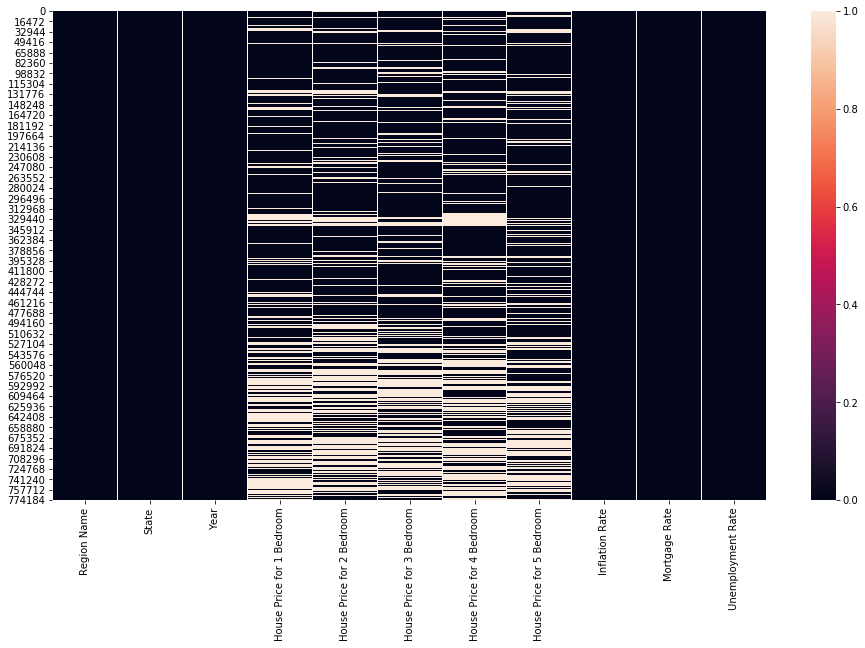

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(HouseDF.isnull())

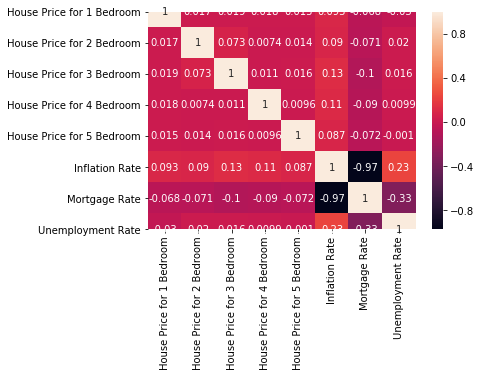

In [11]:
sns.heatmap(HouseDF.corr(), annot=True)

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
dummy_df = pd.get_dummies(HouseDF)
dummy_df

,House Price for 1 Bedroom,House Price for 2 Bedroom,House Price for 3 Bedroom,House Price for 4 Bedroom,House Price for 5 Bedroom,Inflation Rate,Mortgage Rate,Unemployment Rate,Region Name_Abbeville County,Region Name_Acadia Parish,...,Year_9/30/2011,Year_9/30/2012,Year_9/30/2013,Year_9/30/2014,Year_9/30/2015,Year_9/30/2016,Year_9/30/2017,Year_9/30/2018,Year_9/30/2019,Year_9/30/2020
0,171828.0,NaN,107539.0,217366.0,319275.0,202.5,5.92,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
1,86058.0,NaN,429563.0,173730.0,336771.0,202.5,5.92,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,165691.0,NaN,130096.0,136614.0,NaN,202.5,5.92,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
3,101413.0,118944.0,77373.0,86021.0,128538.0,202.5,5.92,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84840.0,69894.0,89360.0,NaN,301777.0,202.5,5.92,4.6,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790631,NaN,NaN,NaN,158081.0,NaN,178.3,6.79,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
790632,72286.0,NaN,NaN,NaN,216179.0,178.3,6.79,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
790633,39008.0,NaN,NaN,NaN,228803.0,178.3,6.79,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
790634,NaN,NaN,NaN,117818.0,164315.0,178.3,6.79,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Handling missing values

In [14]:
num_vars=HouseDF.select_dtypes(include=["int64","float64"]).columns
num_vars


Index(['House Price for 1 Bedroom', 'House Price for 2 Bedroom',
       'House Price for 3 Bedroom', 'House Price for 4 Bedroom',
       'House Price for 5 Bedroom', 'Inflation Rate', 'Mortgage Rate',
       'Unemployment Rate'],
      dtype='object')

In [15]:
imputer_mean = SimpleImputer(strategy='mean')
#imputer_mean = SimpleImputer(strategy='constant', fill_value=99)

In [16]:
imputer_mean.fit(HouseDF[num_vars])




SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [17]:
imputer_mean.statistics_


array([9.43299415e+04, 1.01699291e+05, 1.39054310e+05, 1.89475227e+05,
       2.48027347e+05, 2.08874172e+02, 5.31145695e+00, 5.79503311e+00])

In [18]:
imputer_mean.transform(HouseDF[num_vars])


array([[1.71828000e+05, 1.01699291e+05, 1.07539000e+05, ...,
        2.02500000e+02, 5.92000000e+00, 4.60000000e+00],
       [8.60580000e+04, 1.01699291e+05, 4.29563000e+05, ...,
        2.02500000e+02, 5.92000000e+00, 4.60000000e+00],
       [1.65691000e+05, 1.01699291e+05, 1.30096000e+05, ...,
        2.02500000e+02, 5.92000000e+00, 4.60000000e+00],
       ...,
       [3.90080000e+04, 1.01699291e+05, 1.39054310e+05, ...,
        1.78300000e+02, 6.79000000e+00, 5.00000000e+00],
       [9.43299415e+04, 1.01699291e+05, 1.39054310e+05, ...,
        1.78300000e+02, 6.79000000e+00, 5.00000000e+00],
       [9.32990000e+04, 1.01699291e+05, 1.39054310e+05, ...,
        1.78300000e+02, 6.79000000e+00, 5.00000000e+00]])

In [19]:
HouseDF[num_vars] = imputer_mean.transform(HouseDF[num_vars])



In [20]:
HouseDF[num_vars].isnull().sum()

House Price for 1 Bedroom    0
House Price for 2 Bedroom    0
House Price for 3 Bedroom    0
House Price for 4 Bedroom    0
House Price for 5 Bedroom    0
Inflation Rate               0
Mortgage Rate                0
Unemployment Rate            0
dtype: int64

In [21]:
HouseDF

,Region Name,State,Year,House Price for 1 Bedroom,House Price for 2 Bedroom,House Price for 3 Bedroom,House Price for 4 Bedroom,House Price for 5 Bedroom,Inflation Rate,Mortgage Rate,Unemployment Rate
0,Anchorage Borough,AK,5/31/2006,171828.000000,101699.290727,107539.000000,217366.000000,319275.000000,202.5,5.92,4.6
1,Fairbanks North Star Borough,AK,5/31/2006,86058.000000,101699.290727,429563.000000,173730.000000,336771.000000,202.5,5.92,4.6
2,Juneau Borough,AK,5/31/2006,165691.000000,101699.290727,130096.000000,136614.000000,248027.346982,202.5,5.92,4.6
3,Kenai Peninsula Borough,AK,5/31/2006,101413.000000,118944.000000,77373.000000,86021.000000,128538.000000,202.5,5.92,4.6
4,Ketchikan Gateway Borough,AK,5/31/2006,84840.000000,69894.000000,89360.000000,189475.227157,301777.000000,202.5,5.92,4.6
...,...,...,...,...,...,...,...,...,...,...,...
790631,Mille Lacs County,MN,9/30/2001,94329.941492,101699.290727,139054.309767,158081.000000,248027.346982,178.3,6.79,5.0
790632,Morrison County,MN,9/30/2001,72286.000000,101699.290727,139054.309767,189475.227157,216179.000000,178.3,6.79,5.0
790633,Mower County,MN,9/30/2001,39008.000000,101699.290727,139054.309767,189475.227157,228803.000000,178.3,6.79,5.0
790634,Murray County,MN,9/30/2001,94329.941492,101699.290727,139054.309767,117818.000000,164315.000000,178.3,6.79,5.0


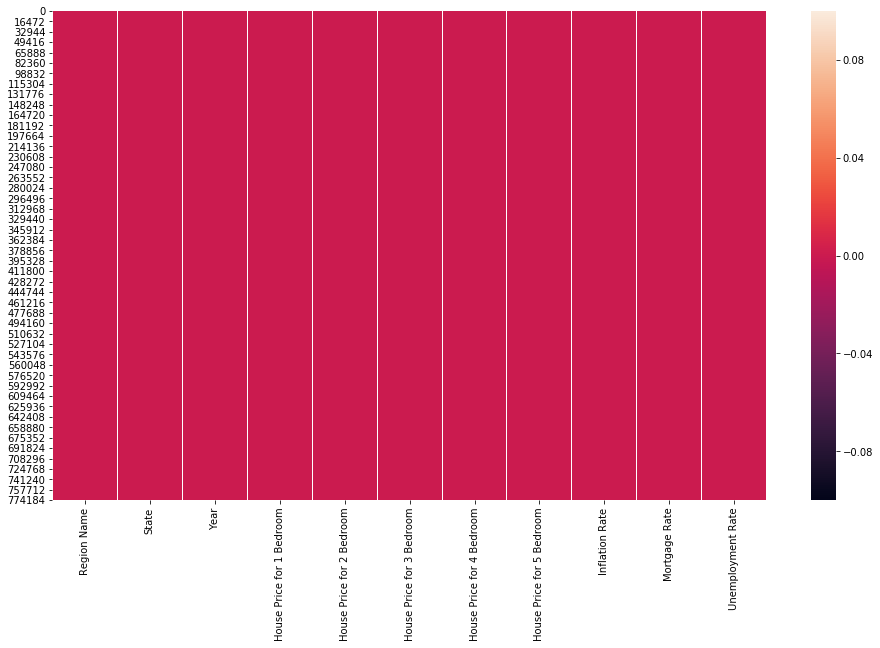

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(HouseDF.isnull())

# Train and Test model

In [23]:

X=HouseDF[['Inflation Rate', 'Mortgage Rate',
       'Unemployment Rate']]
y = HouseDF[['House Price for 1 Bedroom', 'House Price for 2 Bedroom',
       'House Price for 3 Bedroom', 'House Price for 4 Bedroom',
       'House Price for 5 Bedroom']]


# Split Data into Train, Test

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)



Shape of X_train =  (632508, 3)
Shape of y_train =  (632508, 5)
Shape of X_test =  (158128, 3)
Shape of y_test =  (158128, 5)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures




# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)






In [27]:
poly_reg = PolynomialFeatures(degree=1)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)


In [28]:
X_train_poly.shape, X_test_poly.shape


((632508, 4), (158128, 4))

In [29]:
lr = LinearRegression()

lr.fit(X_train_poly, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lr.score(X_test_poly, y_test,)

0.007541227831177157

In [31]:
lr.predict([X_test_poly[0,:]])

array([[ 99291.49402106, 106214.03569399, 145162.95613584,
        197903.87126826, 258749.48498981]])

In [32]:
y_pred = lr.predict(X_test_poly)
y_pred

array([[ 99291.49402106, 106214.03569399, 145162.95613584,
        197903.87126826, 258749.48498981],
       [ 90696.09119178,  98523.76355218, 132955.27434242,
        181456.85136951, 237249.57311278],
       [ 92406.48747899,  99336.88567854, 134779.50903736,
        183964.56828575, 241017.63555524],
       ...,
       [ 92491.69849929, 103800.28899556, 140588.68785397,
        191279.86695129, 247880.32672994],
       [ 98822.14441741, 104149.62033931, 145214.25490421,
        197869.97075215, 260143.17672188],
       [ 90696.09119178,  98523.76355218, 132955.27434242,
        181456.85136951, 237249.57311278]])

In [33]:
y_test

,House Price for 1 Bedroom,House Price for 2 Bedroom,House Price for 3 Bedroom,House Price for 4 Bedroom,House Price for 5 Bedroom
753046,25334.000000,53720.000000,142917.000000,189475.227157,248027.346982
642839,93649.000000,144224.000000,139054.309767,189475.227157,248027.346982
701016,127761.000000,101699.290727,139054.309767,189475.227157,251450.000000
309065,35649.000000,151303.000000,168168.000000,295152.000000,307480.000000
357820,93148.000000,219193.000000,106944.000000,158658.000000,357597.000000
...,...,...,...,...,...
525755,94329.941492,67154.000000,97466.000000,159575.000000,248027.346982
202395,56547.000000,64574.000000,139054.309767,147030.000000,248027.346982
217084,135933.000000,160451.000000,172172.000000,152735.000000,248027.346982
418134,99752.000000,107497.000000,210293.000000,119824.000000,173492.000000


In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse


(13335875578.189253, 115481.06155638357)

In [35]:
lr.score(X_test_poly, y_test,)


0.007541227831177157

In [36]:

from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
predictions = lm.predict(X_test) 

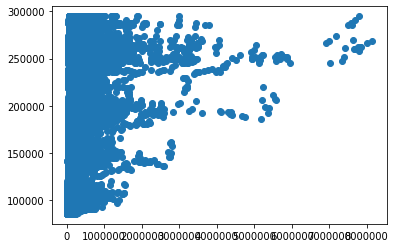

In [38]:
plt.scatter(y_test,predictions)
